**Integrantes**

Luis Chica

Jair Sánchez

_Objetivo_:

Simular y entender el flujo a tráves de la tranformación de Joukowski para el entendimiento de perfiles aerodinamicos.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import numpy.ma as ma
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
rc("animation", html="html5")

In [ ]:
pip install airfoils   #biblioteca de perfiles aerodinamicos

# Transformada de Joukowski y Simulación de Flujo sobre un Alerón

## Introducción

La **Transformada de Joukowski** es una herramienta matemática utilizada en la aerodinámica para modelar el comportamiento de un flujo alrededor de un alerón o perfil aerodinámico. Esta transformación permite transformar un círculo en el plano complejo en un perfil que similar a un alerón, lo que facilita el estudio del flujo alrededor de dicho perfil.

## Definición de la Transformada de Joukowski

La Transformada de Joukowski se define matemáticamente como:

$
[
z = \omega + \frac{1}{\omega}
]
$

donde $ (z = x + iy) $ es la variable en el plano físico y $ (\omega = \xi + i\eta) $ es la variable en el plano transformado.

Esta transformación convierte un círculo en el plano $ (\omega) $ en un perfil aerodinámico en el plano $(z)$, simulando un alerón.


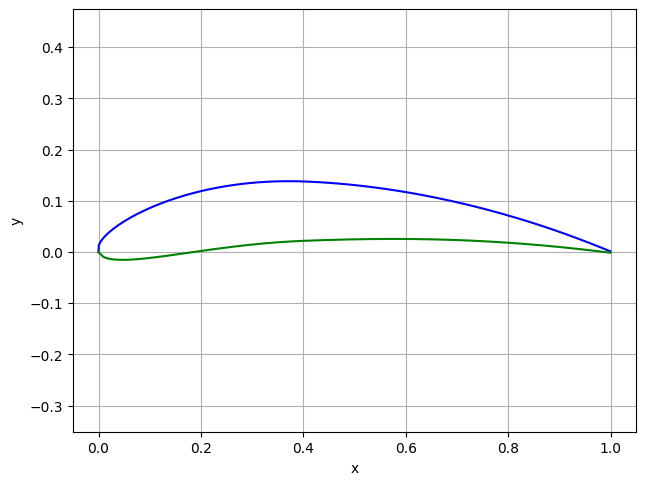

In [ ]:
from airfoils import Airfoil
foil = Airfoil.NACA4("4812")
foil.plot()

### Aplicación de la Transformada de Joukowski

1. **Generación del Alerón**:
   - Se utiliza la Transformada de Joukowski para transformar un círculo en el plano complejo en la forma de un alerón, el cual se dibuja utilizando las partes real e imaginaria del resultado de la transformación.

2. **Transformación de las Partículas del Fluido**:
   - Las posiciones de las partículas del fluido, inicialmente distribuidas en el plano complejo, se transforman mediante la Transformada de Joukowski para simular su interacción con el alerón.

3. **Condición de Frontera**:
   - La distancia mínima entre las partículas transformadas y el alerón se calcula para ajustar su movimiento y evitar que crucen la superficie del alerón, simulando el comportamiento realista del flujo sobre el perfil.


Estas aplicaciones permitirá visualizar cómo un flujo de un fluido interactúa con un alerón, teniendo en cuenta la geometría modificada por la Transformada de Joukowski.


In [ ]:
#Definiendo algunas variables
a = np.linspace(-1,1,100)
b = np.linspace(-1,1,100)
z = a + b * 1j
type(z[-1])

numpy.complex128

In [ ]:
def Juk(z):  #Transformada de Joukowski
  return z + (1) / z

In [ ]:
def cir(b, R):   #circulo
    tetha=np.linspace(0,2*np.pi, 200)
    #return R*np.exp(1j*tetha)
    return b+R*np.exp(1j*tetha)


In [ ]:
arr = Juk(z)

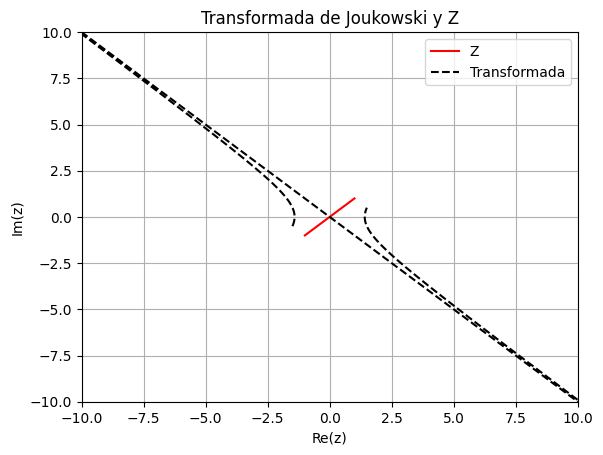

In [ ]:
plt.plot(z.real, z.imag, "r-")
plt.plot(arr.real, arr.imag, "k--")
plt.title("Transformada de Joukowski y Z")
plt.legend(["Z", "Transformada"])
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.grid() #corregir el dominio
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

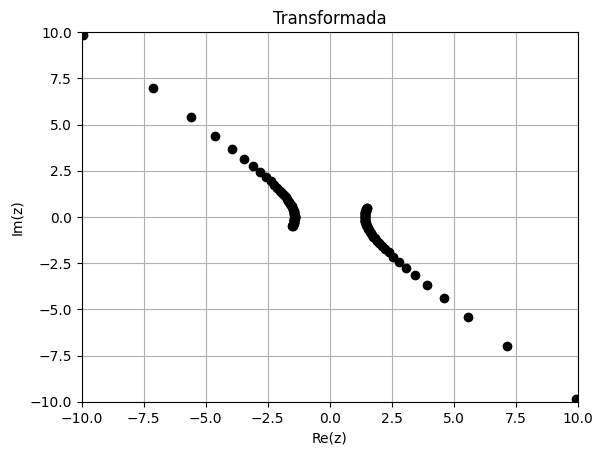

In [ ]:
plt.plot(arr.real, arr.imag, "ko")
plt.title("Transformada")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()
plt.show()

Se puede ver una singularidad en la trasnformada, sin embargo para el desarrollo del flujo sobre el alerón no será de mucho problema.

In [ ]:
radio = 0.23*np.sqrt(26)


ci = cir(-0.17,radio)
j = -Juk(ci)
l =radio/z
#print(l)  #aspect ratio

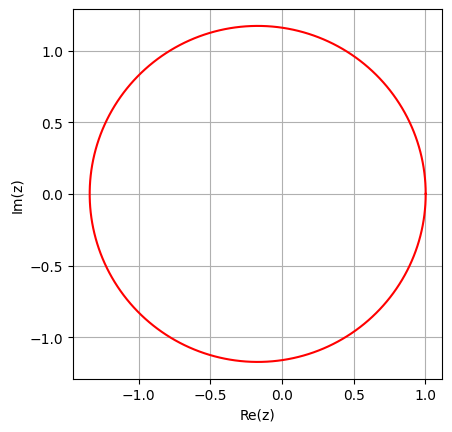

In [38]:
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.plot(ci.real, ci.imag, "r-")
plt.grid()
plt.gca().set_aspect('equal')#, adjustable='box')  # Aplicar relación de aspecto igual
plt.show()

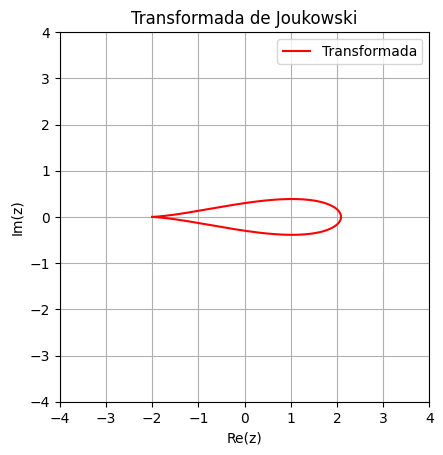

In [ ]:
plt.plot(j.real, j.imag, "r-")
plt.title("Transformada de Joukowski")
plt.legend(["Transformada"])
plt.xlabel("Re(z)")
plt.gca().set_aspect('equal', adjustable='box')  # Aplicar relación de aspecto igual
plt.ylabel("Im(z)")
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.grid()
plt.show()

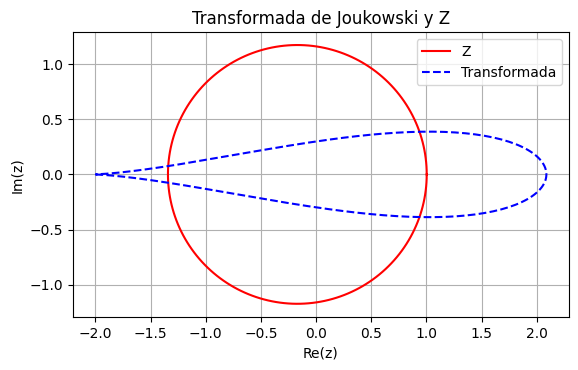

In [ ]:
plt.plot(ci.real, ci.imag, "r-")
plt.plot(j.real, j.imag, "b--")
plt.title("Transformada de Joukowski y Z")
plt.legend(["Z", "Transformada"])
plt.gca().set_aspect('equal', adjustable='box')  # Aplicar relación de aspecto igual
#plt.xlim(-500,500)
#plt.ylim(-500,500)
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.grid()
plt.show()

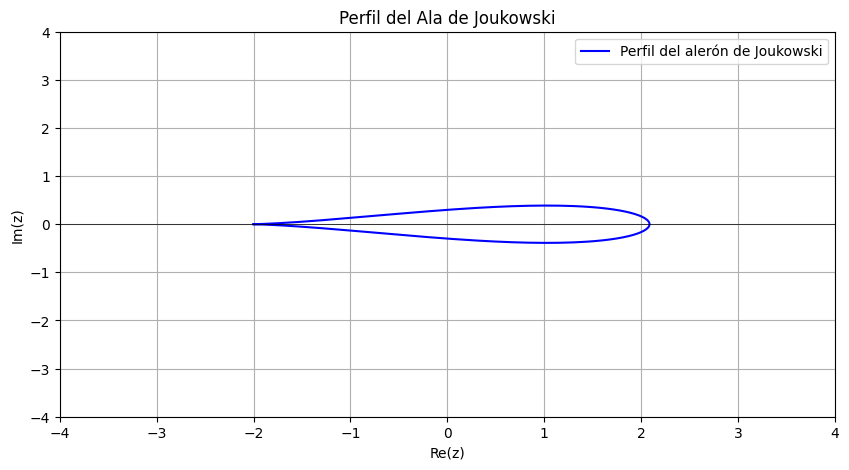

In [ ]:
ale = -Juk(ci)

# Graficamos el perfil del ala de Joukowski
plt.figure(figsize=(10, 5))
plt.plot(ale.real, ale.imag, color="blue", label="Perfil del alerón de Joukowski")
plt.axhline(0, color="black", linewidth=0.5)  # Línea de simetría
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
#plt.plot(arr.real, arr.imag, "k--")
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.title("Perfil del Ala de Joukowski")
plt.legend()
plt.grid(True)


plt.show()


# Aleron entre un flujo

In [ ]:
#w = -Juk(ci) #Aplicamos la transformación de Joukowski p

fig, ax = plt.subplots() #Creamos la figura y los ejes
linea, = ax.plot(np.real(ale), np.imag(ale), "b")  #dibujamos el alerón
punto, = ax.plot([], [], "r_", markersize=10) #puntos para del fluido
#plt.plot(arr.real, arr.imag, "k--")
ax.set_xlabel("Eje Re(z)")  # Nombre del eje X
ax.set_ylabel("Eje Im(z)")
ax.set_xlim(-3, 3)#ejes
ax.set_ylim(-3, 3)
ax.set_aspect("equal")


num_p = 5000 #numero de puntos


puntos = np.zeros((num_p, 2))  #inicio de las posiciones de los puntos
puntos[:, 0] = np.random.rand(num_p) * 8 + 6  # Posiciones x entre 6 y 14 (más a la derecha)
puntos[:, 1] = np.random.rand(num_p) * 6 - 3  # Posiciones y entre -3 y 3


vel_flu = 0.05  #velocidad del fluido

def update(frame):   #función que actualiza la animación

    puntos[:, 0] -= vel_flu  # Mover los puntos hacia la izquierda

    for i in range(num_p):  #evitar que los puntos entren al alerón
        z_p = puntos[i, 0] + 1j * puntos[i, 1]
        w_p = Juk(z_p)


        dist_ale = np.min(np.abs(ale - w_p)) #distancia mínima del punto al alerón (condición de frontera)

        if dist_ale < 0.1:
            if puntos[i, 1] > 0:   #ajustar el fluido al alerón
                puntos[i, 1] += 0.1 * (0.1 - dist_ale)
            else:
                puntos[i, 1] -= 0.1 * (0.1 - dist_ale)


            puntos[i, 0] += 0.05


    con_pu = puntos[:, 0] < -100   #continuidad del flujo
    puntos[con_pu, 0] = 14
    puntos[con_pu, 1] = np.random.rand(np.sum(con_pu)) * 6 - 3  #nuevas posiciones


    z_flu = puntos[:, 0] + 1j * puntos[:, 1] #transformamos los puntos al plano complejo

    w_flu = Juk(z_flu) #transformación de Juk

    punto.set_data(np.real(w_flu), np.imag(w_flu)) #actualizamos la posición de los puntos
    return linea, punto

# Creamos la animación
ani = FuncAnimation(fig, update, frames=range(500), interval=50, blit=True, repeat=False)

# Mostramos la animación
plt.show()


In [ ]:
ani

In [ ]:

fig, ax = plt.subplots()
linea, = ax.plot(np.real(ale), np.imag(ale), "b")  #Dibujamos el alerón
punto, = ax.plot([], [], "r_", markersize=10)

ax.set_xlim(-3, 3)  # Ejes
ax.set_ylim(-3, 3)
ax.set_xlabel("Eje Re(z)")  # Nombre del eje X
ax.set_ylabel("Eje Im(z)")
ax.set_aspect("equal")

num_p = 5000

puntos = np.zeros((num_p, 2))  # Inicio de las posiciones de los puntos
puntos[:, 0] = np.random.rand(num_p) * 8 + 6  #posiciones x entre 6 y 14 (más a la derecha)
puntos[:, 1] = np.random.rand(num_p) * 6 - 3  #posiciones y entre -3 y 3

vel_flu = 0.05  # Velocidad del fluido

def update(frame):  # Función de la animación

    puntos[:, 0] -= vel_flu  #mover los puntos hacia la izquierda

    for i in range(num_p):  # Evitar que los puntos entren al alerón
        z_p = puntos[i, 0] + 1j * puntos[i, 1]
        w_p = Juk(z_p)

        dist_ale = np.min(np.abs(ale - w_p))  # Distancia mínima del punto al alerón

        if dist_ale < 0.1:
            normal = (ale[np.argmin(np.abs(ale - w_p))] - w_p) / dist_ale
            puntos[i, 0] += np.real(normal) * vel_flu
            puntos[i, 1] += np.imag(normal) * vel_flu

    con_pu = puntos[:, 0] < -3  # Continuidad del flujo
    puntos[con_pu, 0] = 14
    puntos[con_pu, 1] = np.random.rand(np.sum(con_pu)) * 6 - 3  # Nuevas posiciones

    z_flu = puntos[:, 0] + 1j * puntos[:, 1]  # Transformamos los puntos al plano complejo
    w_flu = Juk(z_flu)  # Transformación de Joukowski

    punto.set_data(np.real(w_flu), np.imag(w_flu))  # Actualizamos la posición de los puntos
    return linea, punto


ani = FuncAnimation(fig, update, frames=range(500), interval=50, blit=True, repeat=False)

plt.show()


In [ ]:
ani

In [ ]:
#PRUEBAS

In [ ]:
fig, ax = plt.subplots()  # Creamos la figura y los ejes
linea, = ax.plot(np.real(ale), np.imag(ale), "b")  # dibujamos el alerón
punto, = ax.plot([], [], "r_", markersize=10)  # puntos para del fluido

ax.set_xlim(-3, 3)  # ejes
ax.set_ylim(-3, 3)
ax.set_xlabel("Eje Re(z)")  # Nombre del eje X
ax.set_ylabel("Eje Im(z)")
ax.set_aspect("equal")

num_p = 5000  # número de puntos

puntos = np.zeros((num_p, 2))  # inicio de las posiciones de los puntos
puntos[:, 0] = np.random.rand(num_p) * 8 + 6  # Posiciones x entre 6 y 14 (más a la derecha)
puntos[:, 1] = np.random.rand(num_p) * 6 - 3  # Posiciones y entre -3 y 3

vel_flu = 0.05  # velocidad del fluido

def update(frame):  # función que actualiza la animación

    puntos[:, 0] -= vel_flu  # Mover los puntos hacia la izquierda

    for i in range(num_p):  # evitar que los puntos entren al alerón
        z_p = puntos[i, 0] + 1j * puntos[i, 1]
        w_p = Juk(z_p)

        dist_ale = np.min(np.abs(ale - w_p))  # distancia mínima del punto al alerón

        if dist_ale < 0.1:
            angulo = np.angle(w_p)  # ángulo de la posición respecto al alerón
            puntos[i, 0] += 0.05 * np.cos(angulo)  # Mover en la dirección del ángulo
            puntos[i, 1] += 0.05 * np.sin(angulo)  # Mover en la dirección del ángulo

    con_pu = puntos[:, 0] < -100  # continuidad del flujo
    puntos[con_pu, 0] = 14
    puntos[con_pu, 1] = np.random.rand(np.sum(con_pu)) * 6 - 3  # nuevas posiciones

    z_flu = puntos[:, 0] + 1j * puntos[:, 1]  # transformamos los puntos al plano complejo
    w_flu = Juk(z_flu)  # transformación de Juk

    punto.set_data(np.real(w_flu), np.imag(w_flu))  # actualizamos la posición de los puntos
    return linea, punto

# Creamos la animación
ani = FuncAnimation(fig, update, frames=range(500), interval=50, blit=True, repeat=False)

# Mostramos la animación
plt.show()


In [ ]:
ani

In [ ]:

def joukowski(z, c=0.1+2j):
    return z + (c**2 / z)

theta = np.linspace(0, 2 * np.pi, 5000)
z = 1 + 2 * np.exp(1j * theta)

w = -joukowski(z)


fig, ax = plt.subplots()
linea, = ax.plot(np.real(w), np.imag(w), 'k')  # Dibujamos el perfil aerodinámico
punto, = ax.plot([], [], 'r_', markersize=5) # Puntos para simular el fluido

# Configuración de los ejes
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal')
ax.set_xlabel("Eje Re(z)")  # Nombre del eje X
ax.set_ylabel("Eje Im(z)")
plt.xlim(-10, 10)
plt.ylim(-10, 10)

num_p = 5000


puntos = np.zeros((num_p, 2))
puntos[:, 0] = np.random.rand(num_p) * 20 - 10  # Posiciones x entre -10 y 10
puntos[:, 1] = np.random.rand(num_p) * 20 - 10  # Posiciones y entre -10 y 10

# Velocidad del fluido
vel_fl = 0.05

# Función que actualiza la animación
def update(frame):
    # Movemos los puntos del fluido hacia la izquierda
    puntos[:, 0] -= vel_fl

    # Evitamos que los puntos del fluido entren en el perfil aerodinámico
    for i in range(num_p):
        z_p = puntos[i, 0] + 1j * puntos[i, 1]
        w_p = joukowski(z_p)

        # Verificamos si el punto está dentro o cerca del perfil
        if np.min(np.abs(w - w_p)) < 0.1:
            if puntos[i, 1] > 0:
                puntos[i, 1] += 0.1  # Mover hacia arriba
            else:
                puntos[i, 1] -= 0.1  # Mover hacia abajo

            puntos[i, 0] += 0.1  # Mover hacia la derecha


    pp = puntos[:, 0] < -10
    if np.any(pp):  # Si hay puntos que han pasado
        puntos[pp, 0] = 10
        puntos[pp, 1] = np.random.rand(np.sum(pp)) * 20 - 10 # Nueva posición aleatoria en y


    z_flui = puntos[:, 0] + 1j * puntos[:, 1]


    w_flui = joukowski(z_flui)# Aplicamos la transformación de Joukowski a los puntos del fluido

    # Actualizamos la posición de los puntos del fluido
    punto.set_data(np.real(w_flui), np.imag(w_flui))
    return linea, punto

ani2 = FuncAnimation(fig, update, frames=range(500), interval=50, blit=True, repeat=False)
plt.show()



In [ ]:
ani2

## Conclusion

 Las partículas de fluido, inicialmente ubicadas en posiciones aleatorias a la derecha del alerón, se mueven hacia la izquierda con una velocidad constante. Al acercarse al alerón, se evita que las partículas entren en él ajustando sus posiciones de acuerdo con la distancia mínima al perfil del alerón, simulando así la interacción del flujo con el contorno. La animación resultante muestra cómo el flujo se desvía alrededor del alerón, respetando las condiciones de borde impuestas por la transformación.


 Se jugó con variaciones del flujo y además con las coordenadas del circulo (antes de apicarle la transfromada), para que dieran resultados distintos.


## Bibliografia


[1] Ablowitz, M. J., Fokas, A. S. (2003). Complex variables: introduction and applications (2nd ed). Cambridge University Press.

[2] https://complex-analysis.com/contenido/aleron_joukowsky.html



